# Load libraries

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a network object with NetworkX

As the first example, we will load and play around with data extracted from email data from a large European research institution [1,2].

In [23]:
network_data_frame = pd.read_csv('data/email-Eu-core.txt', sep=' ', header = None)

network = nx.Graph()
network.add_edges_from(network_data_frame.values)

Let's display the network to see what it looks like

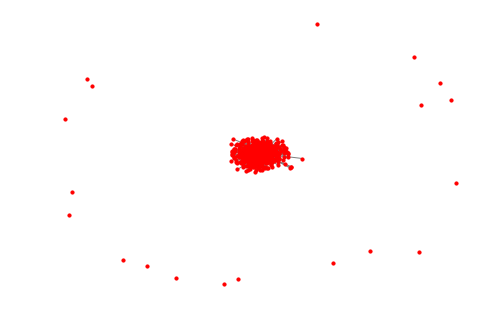

In [4]:
nx.draw(network, node_size = 10, edge_color = 'gray')

In [26]:
parts_generator = nx.connected_components(network)

parts = list(parts_generator)
parts[1:]

[{580},
 {633},
 {648},
 {653},
 {658},
 {660},
 {670},
 {675},
 {684},
 {691},
 {703},
 {711},
 {731},
 {732},
 {744},
 {746},
 {772},
 {798},
 {808}]

In [28]:
singles = [list(x)[0] for x in parts[1:]]

network.remove_nodes_from(singles)

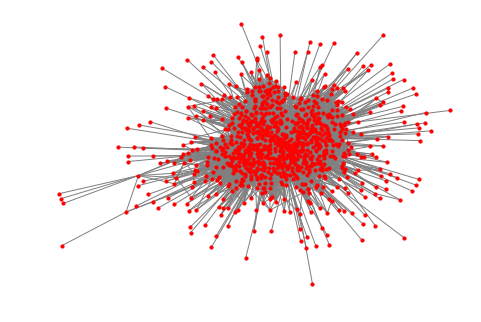

In [29]:
nx.draw(network, node_size = 10, edge_color = 'gray')

In [37]:
list(network.degree)

[(0, 44),
 (1, 52),
 (2, 95),
 (3, 71),
 (4, 96),
 (5, 171),
 (6, 115),
 (7, 72),
 (8, 37),
 (9, 40),
 (10, 47),
 (11, 76),
 (12, 58),
 (13, 180),
 (14, 80),
 (15, 52),
 (16, 74),
 (17, 111),
 (18, 56),
 (19, 72),
 (20, 74),
 (21, 138),
 (22, 15),
 (23, 81),
 (24, 40),
 (25, 33),
 (26, 35),
 (27, 63),
 (28, 105),
 (29, 58),
 (30, 68),
 (31, 50),
 (32, 35),
 (33, 30),
 (34, 31),
 (35, 59),
 (36, 45),
 (37, 37),
 (38, 47),
 (39, 36),
 (40, 60),
 (41, 91),
 (42, 75),
 (43, 14),
 (44, 106),
 (45, 48),
 (46, 73),
 (47, 51),
 (48, 59),
 (49, 15),
 (50, 17),
 (51, 69),
 (52, 26),
 (53, 40),
 (54, 51),
 (55, 43),
 (56, 48),
 (57, 67),
 (58, 126),
 (59, 53),
 (60, 55),
 (61, 71),
 (62, 216),
 (63, 125),
 (64, 170),
 (65, 91),
 (66, 36),
 (67, 9),
 (68, 48),
 (69, 64),
 (70, 18),
 (71, 18),
 (72, 8),
 (73, 31),
 (74, 93),
 (75, 22),
 (76, 24),
 (77, 25),
 (78, 23),
 (79, 44),
 (80, 72),
 (81, 113),
 (82, 233),
 (83, 141),
 (84, 132),
 (85, 39),
 (86, 218),
 (87, 139),
 (88, 33),
 (89, 71),
 (90,

(array([648., 212.,  71.,  32.,  14.,   3.,   5.,   0.,   0.,   1.]),
 array([  1. ,  35.6,  70.2, 104.8, 139.4, 174. , 208.6, 243.2, 277.8,
        312.4, 347. ]),
 <a list of 10 Patch objects>)

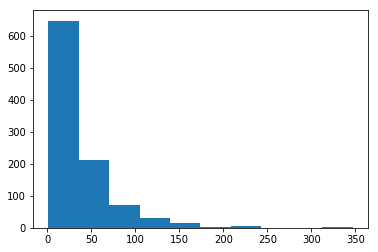

In [38]:
degree_list = [d for n,d in network.degree]

plt.hist(degree_list)

# Final task

In the data/ directory, there are three files (N1.txt, N2.txt, N3.txt) that represent three different networks (undirected and with no weights). 

One is a social network of email exchanges at a Spanish university [3], one is the Western States power grid [4], and one is the (largest cluster of the) protein interaction network in yeast [5].

Your task now it to use the tools above to decide which network corresponds to which file. As those are real examples, the algorithms could take much longer to run, 




### References


[1] Hao Yin, Austin R. Benson, Jure Leskovec, and David F. Gleich. "Local Higher-order Graph Clustering." In Proceedings of the 23rd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. 2017.

[2] J. Leskovec, J. Kleinberg and C. Faloutsos. Graph Evolution: Densification and Shrinking Diameters. ACM Transactions on Knowledge Discovery from Data (ACM TKDD), 1(1), 2007.

[3] R. Guimer, L. Danon, A. Daz-Guilera, F. Giralt, and A. Arenas. Self-similar community structure in a network of human interactions. Physical Review E, 68(6):065103, December 2003.

[4] Duncan J. Watts and Steven H. Strogatz. Collective dynamics of ‘small-world’ networks. Nature, 393(6684):440–442, June 1998.

[5] H. Jeong, S. P. Mason, A.-L. Barabasi, and Z. N. Oltvai. Lethality andcentrality in protein networks. Nature, 411(6833):41–42, May 2001.
